In [20]:
from qiskit import *
from math import pi
import numpy as np
import math
theta = pi

In [31]:
def zplg(i1, i2, i3, i4, i5):
    qc = QuantumCircuit(5,5)
    
    if i1 == '1':
        qc.x(0)
    if i2 == '1':
        qc.x(1)
    if i3 == '1':
        qc.x(2) 
    if i4 == '1':
        qc.x(3)
    if i5 == '1':
        qc.x(4)
    
    qc.barrier()
    qc.cx(1, 4)
    qc.cx(3, 0)
    qc.barrier()
    
    qc.h(3)
    qc.u1(math.radians(90), 3)
    qc.h(3)
    qc.cx(1, 3)
    #qc.cp(theta, 0, 3)

    qc.h(3)
    qc.u1(math.radians(90), 3)
    qc.h(3)
    qc.cx(0, 3)
    
    qc.h(3)
    qc.u1(math.radians(90), 3)
    qc.h(3)
    qc.cx(2, 3)
    
    
    qc.cx(0, 1)
    qc.cx(1, 2)
    
    qc.h(3)
    qc.u1(math.radians(-90), 3)
    qc.h(3)
    qc.cx(2, 3)

    qc.cx(3, 4)
    
    qc.measure(0, 4)
    qc.measure(1, 3)
    qc.measure(2, 2)
    qc.measure(3, 1)
    qc.measure(4, 0)
    
    backend = Aer.get_backend('qasm_simulator')
    job = execute(qc, backend, shots = 1, memory = True)
    output = job.result().get_memory()[0]
    
    return qc, output

input is  0 0 0 0 0 output is  00011
input is  0 0 0 0 1 output is  00010
input is  0 0 0 1 0 output is  11100
input is  0 0 0 1 1 output is  11101
-------------------------------------
input is  0 0 1 0 0 output is  00111
input is  0 0 1 0 1 output is  00110
input is  0 0 1 1 0 output is  11000
input is  0 0 1 1 1 output is  11001
-------------------------------------
input is  0 1 0 0 0 output is  01110
input is  0 1 0 0 1 output is  01111
input is  0 1 0 1 0 output is  10001
input is  0 1 0 1 1 output is  10000
-------------------------------------
input is  0 1 1 0 0 output is  01010
input is  0 1 1 0 1 output is  01011
input is  0 1 1 1 0 output is  10101
input is  0 1 1 1 1 output is  10100
-------------------------------------
input is  1 0 0 0 0 output is  11111
input is  1 0 0 0 1 output is  11110
input is  1 0 0 1 0 output is  00000
input is  1 0 0 1 1 output is  00001
-------------------------------------
input is  1 0 1 0 0 output is  11011
input is  1 0 1 0 1 output is  11

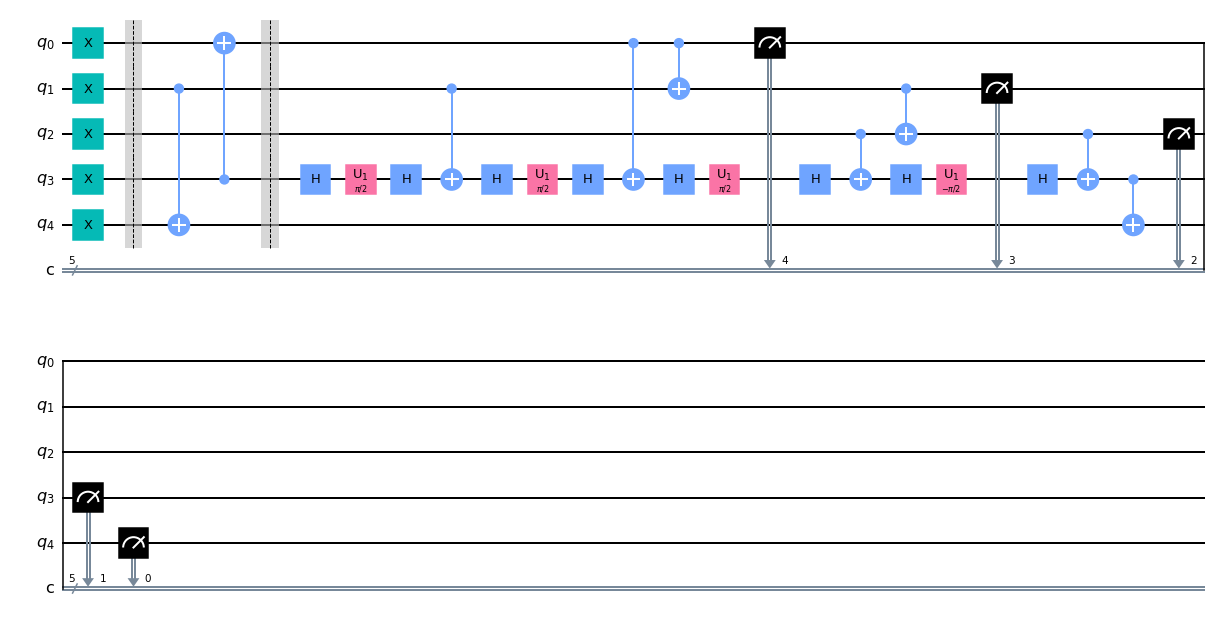

In [32]:
for i1 in ['0', '1']:
    for i2 in ['0', '1']:
        for i3 in ['0', '1']:
            for i4 in ['0', '1']:
                for i5 in ['0', '1']:
                    qc, output = zplg(i1, i2, i3, i4, i5)
                    print("input is ", i1, i2, i3, i4, i5, "output is ", output )
            print("-------------------------------------")
qc.draw('mpl')